In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

clients_org = pd.read_csv("C:\\Neha\\Classes\\Machine Learning\\Project\\default of credit card clients.csv")

In [121]:
print(clients_org.shape)

(30000, 25)


In [122]:
#Create null values

clients_org['pay_0'] = clients_org['pay_0'].sample(frac=.85)
clients_org['pay_2'] = clients_org['pay_2'].sample(frac=.85)
clients_org['pay_3'] = clients_org['pay_3'].sample(frac=.85)
clients_org['pay_4'] = clients_org['pay_4'].sample(frac=.85)
clients_org['bill_amt1'] = clients_org['bill_amt1'].sample(frac=.85)
clients_org['bill_amt3'] = clients_org['bill_amt3'].sample(frac=.85)
clients_org['bill_amt5'] = clients_org['bill_amt5'].sample(frac=.85)
clients_org['pay_amt5'] = clients_org['pay_amt5'].sample(frac=.85)
clients_org['pay_amt6'] = clients_org['pay_amt6'].sample(frac=.85)



In [123]:
null_columns=clients_org.columns[clients_org.isnull().any()]

clients_org[null_columns].isnull().sum()

pay_0        4500
pay_2        4500
pay_3        4500
pay_4        4500
bill_amt1    4500
bill_amt3    4500
bill_amt5    4500
pay_amt5     4500
pay_amt6     4500
dtype: int64

In [124]:
print(clients_org.shape )
print("\n")
null_data = clients_org[clients_org.isnull().any(axis=1)]
null_data.head()

(30000, 25)




,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,1,20000,2,2,1,24,NaN,2.0,NaN,-1.0,...,0,0.0,0,0,689,0,0,0.0,0.0,1
2,3,90000,2,2,2,34,0.0,NaN,0.0,0.0,...,14331,NaN,15549,1518,1500,1000,1000,1000.0,5000.0,0
3,4,50000,2,2,1,37,NaN,0.0,0.0,0.0,...,28314,NaN,29547,2000,2019,1200,1100,NaN,1000.0,0
4,5,50000,1,2,1,57,-1.0,0.0,-1.0,NaN,...,20940,19146.0,19131,2000,36681,10000,9000,689.0,679.0,0
5,6,50000,1,1,2,37,NaN,0.0,0.0,0.0,...,19394,NaN,20024,2500,1815,657,1000,NaN,800.0,0


In [125]:
#check for duplicate rows and columns
clients_org1 = clients_org.duplicated()
print(clients_org[clients_org1]) #There are no duplicates record found

#Removing duplicates (Following the prototype)
clients_org = clients_org[clients_org.duplicated() == False]


Empty DataFrame
Columns: [id, limit_bal, sex, education, marriage, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt1, bill_amt2, bill_amt3, bill_amt4, bill_amt5, bill_amt6, pay_amt1, pay_amt2, pay_amt3, pay_amt4, pay_amt5, pay_amt6, default_payment_next_month]
Index: []

[0 rows x 25 columns]


In [126]:
clients_org.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 25 columns):
id                            30000 non-null int64
limit_bal                     30000 non-null int64
sex                           30000 non-null int64
education                     30000 non-null int64
marriage                      30000 non-null int64
age                           30000 non-null int64
pay_0                         25500 non-null float64
pay_2                         25500 non-null float64
pay_3                         25500 non-null float64
pay_4                         25500 non-null float64
pay_5                         30000 non-null int64
pay_6                         30000 non-null int64
bill_amt1                     25500 non-null float64
bill_amt2                     30000 non-null int64
bill_amt3                     25500 non-null float64
bill_amt4                     30000 non-null int64
bill_amt5                     25500 non-null float64
bill_amt6 

In [127]:
#renaming the columns "pay_0" to "pay_1"
clients_mod = clients_org.rename(columns={'pay_0': 'pay_1'})

#renaming the columns "default_payment_next_month" to "is_default"
clients_mod = clients_mod.rename(columns={'default_payment_next_month': 'is_default'})

In [128]:
#Each record in a row is independent of other records. 
#Hence some missing values do not affect in predicting for other rows. 
#We will be dropping those rows which have null values.
clients_mod = clients_mod.dropna()
clients_mod.shape

(6957, 25)

In [129]:
print(clients_mod['is_default'].value_counts())
clients_mod.drop(['id'], inplace=True, axis =1)

0    5473
1    1484
Name: is_default, dtype: int64


In [130]:
cl_cor =clients_mod.corr()

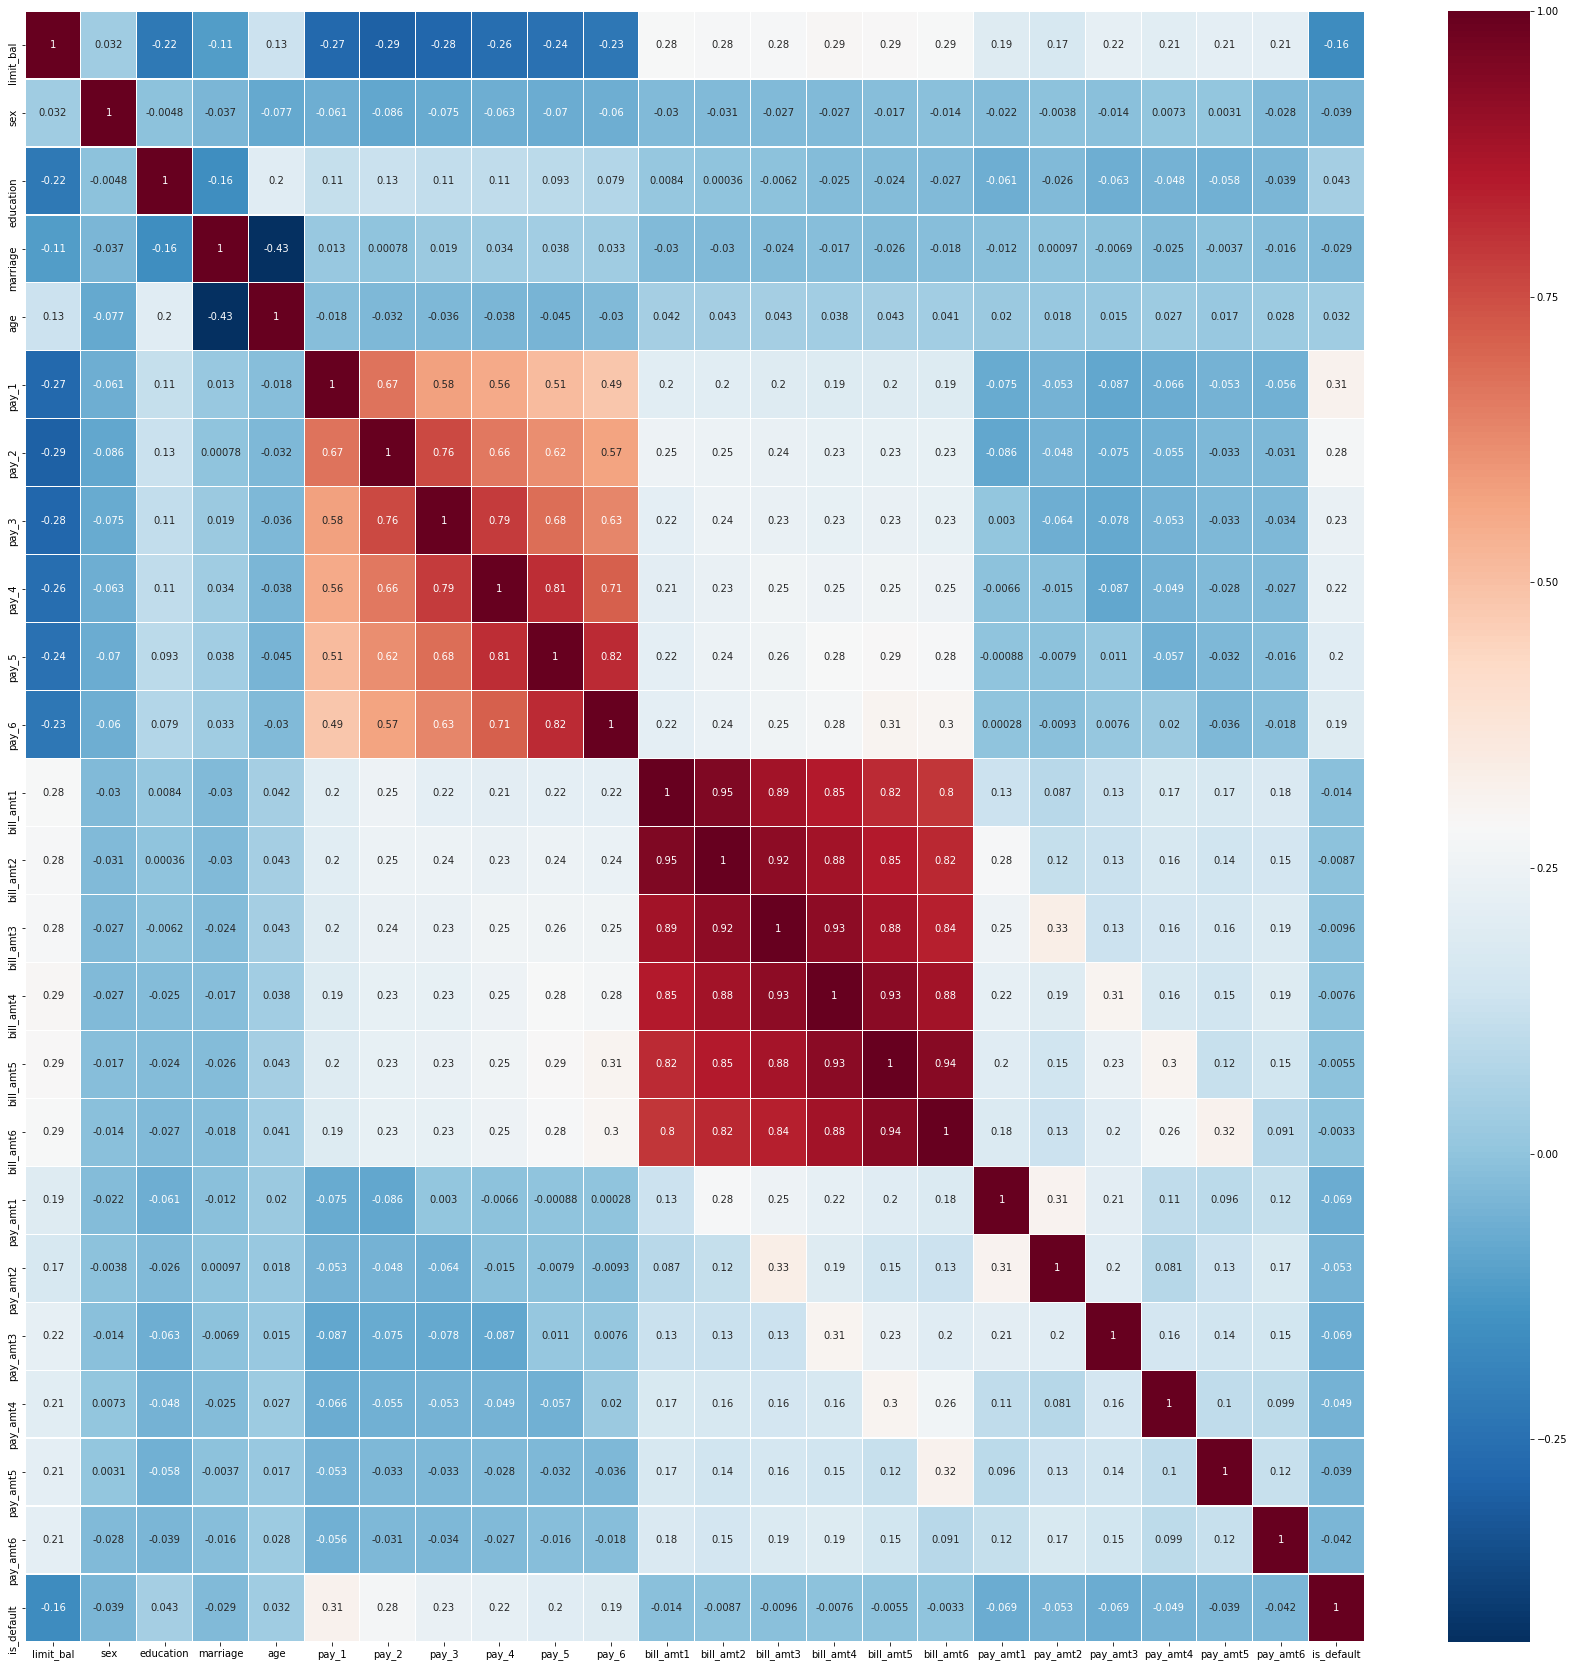

In [131]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(30,30)) 
sns.heatmap(cl_cor,annot=True,cmap='RdBu_r',linewidths=0.15, ax=ax)

In [132]:
corr_matrix = clients_mod.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
cl_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [133]:
cl_drop

['bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']

In [134]:
clients_mod = clients_mod.drop(cl_drop,axis=1)
print(clients_mod.shape)

(6957, 19)


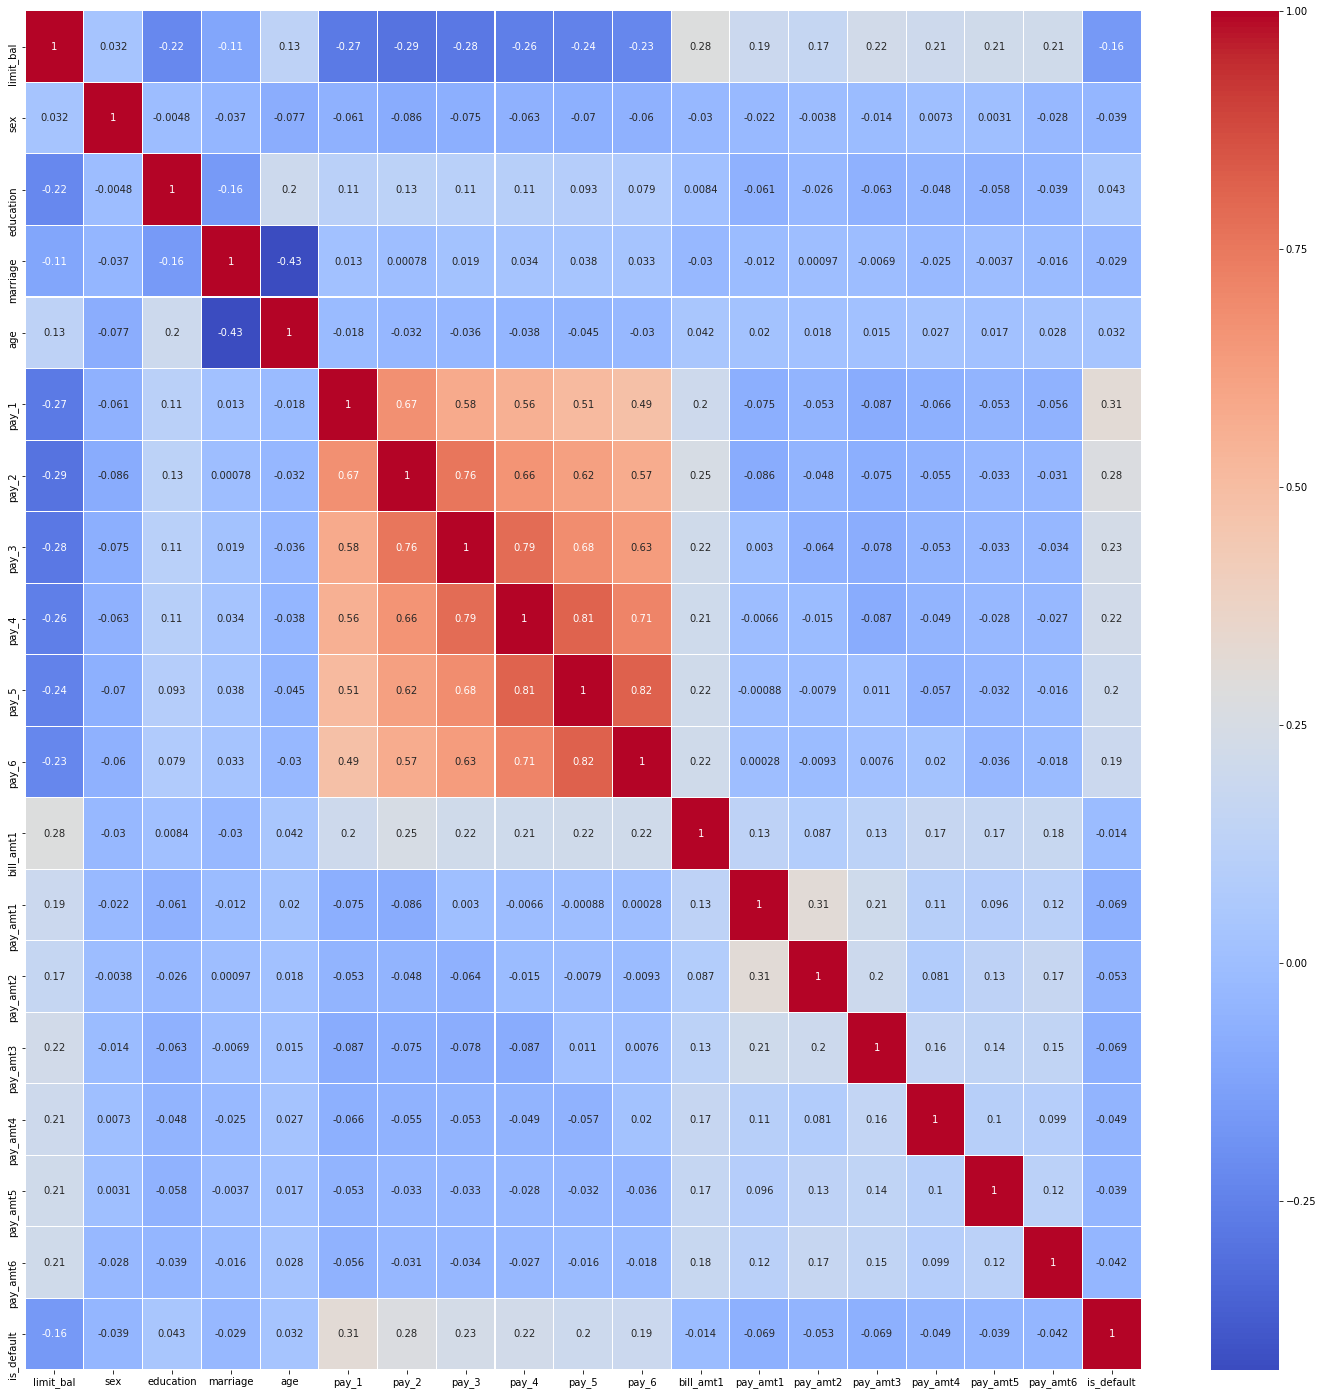

In [135]:
#Checking Correlation after droping those variables
clients_mod1 = clients_mod.corr()
fig, ax = plt.subplots(figsize=(25,25)) 
sns.heatmap(clients_mod1,annot=True,cmap='coolwarm',linewidths=0.1, ax=ax)

In [136]:
#Removing outliers with 3sigma rule
import scipy.stats as stats
clients_mod = clients_mod[(np.abs(stats.zscore(clients_mod)) < 3).all(axis=1)]
clients_mod.shape

(6171, 19)

In [137]:
#marriage
#Only two marital statuses are known (1 and 2). If the marital status is 0 or 3, we group them as unknown. 
#Replacing any marital status with 3 as its value is assigned value 0.
#Marital status (1 = married; 2 = single; 3 = others). 
print(clients_mod['marriage'].value_counts())

#The record for 0 is not defined, hence we replace that to the 3rd category under marriage
clients_mod['marriage'] = np.where((clients_mod.marriage == 0),3,clients_mod.marriage)
clients_mod['marriage'].value_counts()

2    3404
1    2700
3      67
Name: marriage, dtype: int64


2    3404
1    2700
3      67
Name: marriage, dtype: int64

In [138]:
#Education
#Education can have a value 0 which was not known before.
#Grouping 0,4,5,6 as unknowns.
#Replacing any education greater than or equal to four with 0
clients_mod.loc[clients_mod.education >= 4, 'education'] = 4
clients_mod['education'] = np.where((clients_mod.education == 0),4,clients_mod.education)

## Handling categorical variables

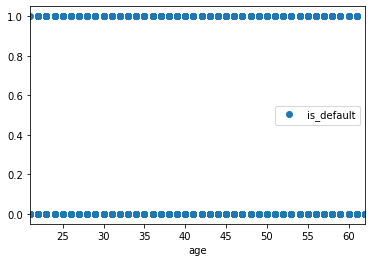

In [139]:
clients_mod.plot(x='age', y='is_default', style='o')

In [140]:
#As we are predicting if a person is credible for next month, age doesnt make much of an impact.
#The change in age in a month is a very trivial change to be considered.
#Since we have many values for age and creating group for these ages will not help our model, we decide to drop this 
#column

clients_mod.drop(['age'], inplace=True, axis =1)

In [141]:
clients_mod.shape

(6171, 18)

In [142]:
#Education
#Education can have a value 0 which was not known before.
#Grouping 0,4,5,6 as unknowns.
#Replacing any education greater than or equal to four with 0
clients_mod.loc[clients_mod.education >= 4, 'education'] = 0

In [143]:
#Only two marital statuses are known (1 and 2). If the marital status is 0 or 3, we group them as unknown. 
#Replacing any marital status with 3 as its value is assigned value 0.
#Marital status (1 = married; 2 = single; 3 = others). 
clients_mod['marriage'].value_counts()

2    3404
1    2700
3      67
Name: marriage, dtype: int64

In [144]:
#The record for 0 is not defined, hence we replace that to the 3rd category under marriage
clients_mod['marriage'] = np.where((clients_mod.marriage == 0),3,clients_mod.marriage)
clients_mod['marriage'].value_counts()

2    3404
1    2700
3      67
Name: marriage, dtype: int64

In [145]:
clients_mod = pd.concat([clients_mod,pd.get_dummies(clients_mod['marriage'], prefix='marriage',dummy_na=True)],axis=1).drop(['marriage'],axis=1)
clients_mod.drop('marriage_nan', axis=1, inplace=True)
clients_mod = clients_mod.rename(columns={"marriage_1.0": "marriage_1","marriage_2.0": "marriage_2","marriage_3.0": "marriage_3"})

In [146]:
clients_mod['education'].unique()

array([2, 3, 1, 0], dtype=int64)

In [147]:
clients_mod = pd.concat([clients_mod,pd.get_dummies(clients_mod['education'], prefix='education',dummy_na=True)],axis=1).drop(['education'],axis=1)
clients_mod.drop('education_nan', axis=1, inplace=True)
clients_mod = clients_mod.rename(columns={"education_0.0": "education_0","education_1.0": "education_1","education_2.0": "education_2","education_3.0": "education_3","education_4.0": "education_4"})

In [148]:
clients_mod.head(1)

,limit_bal,sex,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,pay_amt1,...,pay_amt5,pay_amt6,is_default,marriage_1,marriage_2,marriage_3,education_0,education_1,education_2,education_3
1,120000,2,-1.0,2.0,0.0,0.0,0,2,2682.0,0,...,0.0,2000.0,1,0,1,0,0,0,1,0


In [149]:
#feature selection using VARIANCE INFLATION FACTOR

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

clients = add_constant(clients_mod)
pd.Series([variance_inflation_factor(clients_mod.values, i) 
               for i in range(clients_mod.shape[1])], index=clients_mod.columns)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


limit_bal      1.438353
sex            1.012421
pay_1          1.883400
pay_2          2.999411
pay_3          3.535941
pay_4          4.013593
pay_5          4.377622
pay_6          3.112366
bill_amt1      1.373737
pay_amt1       1.304226
pay_amt2       1.287645
pay_amt3       1.281208
pay_amt4       1.273858
pay_amt5       1.254635
pay_amt6       1.236635
is_default     1.149136
marriage_1          inf
marriage_2          inf
marriage_3          inf
education_0         inf
education_1         inf
education_2         inf
education_3         inf
dtype: float64

In [150]:
#Removing varibales who has higher values
clients_1 = clients.drop(['marriage_1','marriage_2','marriage_3','education_0','education_1','education_2','education_3'],axis=1)

In [151]:
#Repeating VIF process

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

clients = add_constant(clients_1)
pd.Series([variance_inflation_factor(clients.values, i) 
               for i in range(clients.shape[1])], index=clients.columns)

const         14.824931
limit_bal      1.342888
sex            1.009946
pay_1          1.882213
pay_2          2.992278
pay_3          3.535526
pay_4          4.008936
pay_5          4.370538
pay_6          3.109915
bill_amt1      1.369177
pay_amt1       1.303691
pay_amt2       1.285215
pay_amt3       1.280082
pay_amt4       1.272672
pay_amt5       1.252798
pay_amt6       1.235417
is_default     1.146325
dtype: float64

In [152]:
clients = clients.drop(['const'],axis=1)

In [153]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6171 entries, 1 to 29999
Data columns (total 16 columns):
limit_bal     6171 non-null int64
sex           6171 non-null int64
pay_1         6171 non-null float64
pay_2         6171 non-null float64
pay_3         6171 non-null float64
pay_4         6171 non-null float64
pay_5         6171 non-null int64
pay_6         6171 non-null int64
bill_amt1     6171 non-null float64
pay_amt1      6171 non-null int64
pay_amt2      6171 non-null int64
pay_amt3      6171 non-null int64
pay_amt4      6171 non-null int64
pay_amt5      6171 non-null float64
pay_amt6      6171 non-null float64
is_default    6171 non-null int64
dtypes: float64(7), int64(9)
memory usage: 819.6 KB


## Creating numpy arrays for features and target

In [251]:
X = clients.drop('is_default',axis=1).values
y = clients['is_default'].values

In [252]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)
X_train_org

array([[ 3.000e+05,  1.000e+00, -1.000e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 5.000e+05,  1.000e+00,  0.000e+00, ...,  1.426e+03,  7.470e+02,
         1.476e+03],
       [ 2.000e+05,  2.000e+00, -1.000e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       ...,
       [ 3.200e+05,  2.000e+00, -1.000e+00, ...,  8.000e+03,  5.600e+03,
         2.604e+03],
       [ 3.600e+05,  1.000e+00, -1.000e+00, ...,  0.000e+00,  8.850e+02,
         1.595e+03],
       [ 2.700e+05,  2.000e+00,  0.000e+00, ...,  3.000e+03,  3.000e+03,
         2.200e+03]])

In [156]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [253]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [158]:
print(X_train, X_test)

[[0.54716981 0.         0.2        ... 0.         0.         0.        ]
 [0.9245283  0.         0.4        ... 0.0264564  0.01421612 0.024     ]
 [0.35849057 1.         0.2        ... 0.         0.         0.        ]
 ...
 [0.58490566 1.         0.2        ... 0.14842301 0.10657329 0.04234146]
 [0.66037736 0.         0.2        ... 0.         0.01684239 0.02593496]
 [0.49056604 1.         0.4        ... 0.05565863 0.05709283 0.03577236]] [[0.35849057 0.         0.4        ... 0.02762523 0.02283713 0.01788618]
 [0.35849057 1.         0.2        ... 0.00556586 0.16954668 0.09219512]
 [0.30188679 1.         0.6        ... 0.         0.00715564 0.        ]
 ...
 [0.60377358 1.         0.6        ... 0.         0.         0.        ]
 [0.03773585 0.         0.8        ... 0.01604824 0.02175237 0.        ]
 [0.0754717  0.         0.8        ... 0.00556586 0.00570928 0.03252033]]


### Logistic regression

In [171]:
log_clf = LogisticRegression()
penalty = ['l1', 'l2']
C = [0.001,0.01,0.1,1,10,100]
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(log_clf,parameters, cv=6, return_train_score=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [172]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'penalty': 'l1'}
Best cross-validation score: 0.81


In [173]:
log_l1 = LogisticRegression(penalty = 'l1', C = 1)
log_l1.fit(X_train, y_train)
#log_l2.fit(X_train, y_train)
print(log_l1.score(X_train, y_train))
#test_score_l1.append(log_l1.score(X_test, y_test))
print(log_l1.score(X_test, y_test))

0.8111831442463533
0.8234817813765182


In [168]:
log_clf = LogisticRegression(C=1)
log_clf.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [169]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
log_l1 = LogisticRegression(penalty = 'l1', C = 1)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(log_l1 , X_train, y_train, cv=kfold)))
scores = cross_val_score(log_l1 , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.81773998 0.79586877 0.81287971 0.81652491 0.80656934 0.80900243]
0.8097641903151388


In [170]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score
log_l1 = LogisticRegression(penalty = 'l1', C = 1)
log_l1.fit(X_train, y_train)
ypred = log_l1.predict(X_test)
ft = f1_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test)
print(ft)
print(cm)

0.4043715846994536
[[943 173]
 [ 45  74]]


##### Logistic Regression Summary 

Train score: 0.8111

Test score: 0.8234

Cross validation score:0.81

Best parameters: c: 1 

Best parameters: penalty: l1 

F1 Score : 0.4043

### KNN Classifier

In [159]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

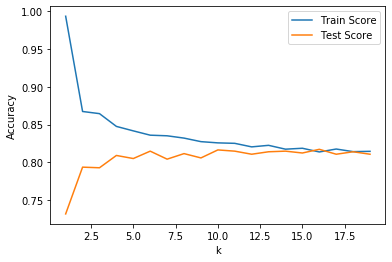

In [44]:
import matplotlib.pyplot as plt
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score')
plt.plot(x_axis, test_score_array, label = 'Test Score')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [160]:
knn = KNeighborsClassifier(13)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.8185
Test score: 0.8154


In [163]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=13)
print("Cross-validation scores:\n{}".format(cross_val_score(knn , X_train, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.82105263 0.81315789 0.8        0.76842105 0.78947368 0.80789474
 0.83684211 0.81052632 0.8        0.80474934 0.77836412 0.81530343
 0.79683377]
0.8032783908217878


In [164]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
 
knn = KNeighborsClassifier(20)
knn.fit(X_train, y_train)
ypred = knn.predict(X_test)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test)
print(cm)
print(f)

[[930 164]
 [ 58  83]]
0.42783505154639173


##### KNN Classification Summary

Train score: 0.8185

Test score: 0.8154

Cross validation score:0.8032

Best parameters: n_neighbors: 13

F1 Score = 0.4278

### Decision Tree 

In [254]:
from sklearn.tree import DecisionTreeClassifier

for i in range(1,10):
    dtree_clf = DecisionTreeClassifier(max_depth=i, random_state=0)
    dtree_clf.fit(X_train, y_train)
    train= dtree_clf.score(X_train, y_train)
    test = dtree_clf.score(X_test, y_test)
    print("Accuracy on training set: {:.3f}".format(dtree_clf.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(dtree_clf.score(X_test, y_test)))

Accuracy on training set: 0.817
Accuracy on test set: 0.829
Accuracy on training set: 0.817
Accuracy on test set: 0.829
Accuracy on training set: 0.820
Accuracy on test set: 0.824
Accuracy on training set: 0.827
Accuracy on test set: 0.822
Accuracy on training set: 0.829
Accuracy on test set: 0.824
Accuracy on training set: 0.835
Accuracy on test set: 0.823
Accuracy on training set: 0.844
Accuracy on test set: 0.813
Accuracy on training set: 0.855
Accuracy on test set: 0.814
Accuracy on training set: 0.869
Accuracy on test set: 0.798


In [255]:
dtree_clf = DecisionTreeClassifier(random_state=0)
parameters = { 'max_depth' : [1,2,3,4,5,6,7,8,9,10]}

In [256]:
grid_search = GridSearchCV(dtree_clf,parameters, cv=6, return_train_score=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [257]:
dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.995
Accuracy on test set: 0.737


In [196]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 2}
Best cross-validation score: 0.82


In [258]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score
dtree = DecisionTreeClassifier(max_depth=2, random_state=0)
dtree.fit(X_train, y_train)
ypred = dtree.predict(X_test)
cm = confusion_matrix(ypred,y_test)
ft = f1_score(ypred,y_test)
print(cm)
print(ft)

[[940 163]
 [ 48  84]]
0.44327176781002636


Using Grid search, we find the max depth as 2 in decision tree model


### Decision tree summary

Train score: 0.995

Test score: 0.737

Cross validation score:0.82

F1 Score :0.443

### Linear SVC

In [78]:
from sklearn.model_selection import GridSearchCV
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV
svc_linear_clf = SVC(kernel = 'linear', probability=True)

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(svc_linear_clf,parameters, cv=6, return_train_score=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train1, y_train1)

In [ ]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

### Gaussian Naive Bayes

In [50]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)
scaler = MinMaxScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [51]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [52]:
print(gnb_clf.score(X_train,y_train))
print(gnb_clf.score(X_test,y_test))

0.7567449956483899
0.7690802348336595


### Soft Voting

In [50]:
#Soft voting using logistic regression and Gaussian naive bayes
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [56]:
voting_clf = VotingClassifier(estimators=[('lr', log_clf),('Gaussian',gnb_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Gaussian',
                              GaussianNB(priors=None, var_smoothing=1e-09))],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [57]:
from sklearn.metrics import accuracy_score
for clf in (log_clf,gnb_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.7838499184339315
GaussianNB 0.535889070146819
VotingClassifier 0.666394779771615


### Hard Voting

In [53]:
# Hard voting using knn classifier and Gaussian naive bayes

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [54]:
voting_clf = VotingClassifier(estimators=[('knn', knn),('Gaussian',gnb_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=13,
                                                   p=2, weights='uniform')),
                             ('Gaussian',
                              GaussianNB(priors=None, var_smoothing=1e-09))],
                 flatten_transform=True, n_jobs=None, voting='hard',
                 weights=None)

In [55]:

from sklearn.metrics import accuracy_score
for clf in (knn,gnb_clf,voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


KNeighborsClassifier 0.7707993474714518
GaussianNB 0.535889070146819
VotingClassifier 0.7707993474714518


### Bagging

In [58]:
# Bagging with decision tree and logistic regression

from sklearn.ensemble import BaggingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [59]:
param_grid = {
    'max_samples' : [0.01, 0.05, 0.10, 0.20, 0.50 ]
}

In [60]:
clf = GridSearchCV(BaggingClassifier(dtree_clf,
                                     n_estimators = 100, bootstrap=True,random_state=0),
                   param_grid, cv=6)
clf.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                               min_samples_split=2,
                                                   

In [61]:
print("Best parameters: {}".format(clf.best_params_))

Best parameters: {'max_samples': 0.05}


In [62]:
y_pred = clf.predict(X_test)

In [63]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8287112561174551


In [64]:
clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(clf.score(X_test, y_test)))

Train score: 0.82
Test score: 0.83


In [65]:
tree_clf = DecisionTreeClassifier(max_depth=1, random_state=0)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

0.83278955954323


In [66]:
#Bagging with logistic regression

In [67]:
bag_log_clf = GridSearchCV(BaggingClassifier(log_clf,
                                     n_estimators = 100, max_features = 8,bootstrap=True, random_state=0),
                   param_grid, cv=6)
bag_log_clf.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=LogisticRegression(C=1,
                                                                           class_weight=None,
                                                                           dual=False,
                                                                           fit_intercept=True,
                                                                           intercept_scaling=1,
                                                                           l1_ratio=None,
                                                                           max_iter=100,
                                                                           multi_class='warn',
                                                                           n_jobs=None,
                                                                           penalty='l2',
                                             

In [68]:
y_pred = bag_log_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7862969004893964


In [69]:
bag_log_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_log_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_log_clf.score(X_test, y_test)))

Train score: 0.78
Test score: 0.79


### Pasting

In [79]:
# Pasting using KNN Classifier

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [81]:
clf = GridSearchCV(BaggingClassifier(svc_linear_clf,
                                     n_estimators = 100, bootstrap=False,random_state=0),
                   param_grid, cv=6)
clf.fit(X_train, y_train)

NameError: name 'svc_linear_clf' is not defined

### ADABoost

In [259]:
from sklearn.ensemble import AdaBoostClassifier

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

In [261]:
dtree_clf = DecisionTreeClassifier(max_depth=8, random_state=0)
dtree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [262]:
knn_clf = KNeighborsClassifier(13)
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [263]:
param_grid = {
    'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'n_estimators' : [100,200,300,400,500,600,700]
}

In [264]:
ada_clf = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), algorithm="SAMME.R", random_state=0),param_grid,cv=6)
ada_clf.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=2,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
                                                                                min

In [265]:
print("Best parameters: {}".format(ada_clf.best_params_))
print("Best cross-validation score: {:.2f}".format(ada_clf.best_score_))

Best parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Best cross-validation score: 0.81


In [266]:
y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8275303643724696


In [267]:
# Best cross-validation score is 0.81 for Decision Tree without Ada-Boost

Adaboost with Gaussian Naive Bayes

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

In [269]:
param_grid = {
    'n_estimators'  : [100,200,300,400,500,600,700],
    'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    
}

ada_clf = GridSearchCV(AdaBoostClassifier(gnb_clf, algorithm="SAMME.R", random_state=0),param_grid,cv=6)
ada_clf.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=GaussianNB(priors=None,
                                                                    var_smoothing=1e-09),
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=0),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9, 1.0],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [270]:
print("Best parameters: {}".format(ada_clf.best_params_))
print("Best cross-validation score: {:.2f}".format(ada_clf.best_score_))

Best parameters: {'learning_rate': 0.1, 'n_estimators': 600}
Best cross-validation score: 0.81


In [271]:
y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8137651821862348


### Gradiant boosting

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

In [71]:
param_grid = {
    'max_depth' : [1,2,3,4,5,6,7,8,9,10]
}

In [72]:
gbr_clf = GridSearchCV(GradientBoostingClassifier(random_state=0),param_grid,cv=6)
gbr_clf.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [73]:
print("Best parameters: {}".format(gbr_clf.best_params_))
print("Best cross-validation score: {:.2f}".format(gbr_clf.best_score_))

Best parameters: {'max_depth': 1}
Best cross-validation score: 0.81


In [74]:
# Setting MAX_DEPTH=1
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### PCA

In [105]:
from sklearn.decomposition import PCA

In [198]:
clients_pca = clients

In [199]:
X = clients_pca.drop('is_default',axis=1).values
y = clients_pca['is_default'].values

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

In [177]:
#create model
pca = PCA(n_components=0.95,random_state = 0)

#train pca model
pca.fit(X_train)

#transforming X_train and X_test
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

In [110]:
X_train_reduced

array([[-127026.81400923,   -8822.87092879],
       [-127752.14103204,  -17886.36616873],
       [ 311673.69491219,  192904.03564599],
       ...,
       [-106420.80584021,   -3072.80329393],
       [ 140018.77531015,   63310.95216674],
       [-137463.80855733,  -13890.1471129 ]])

In [111]:
pca.n_components_

2

In [112]:
pca.explained_variance_

array([1.41402659e+10, 3.00101105e+09])

In [113]:
pca.explained_variance_ratio_

array([0.8163234 , 0.17324961])

In [114]:
scaler = MinMaxScaler()
X_train_pca = scaler.fit_transform(X_train_reduced)
X_test_pca = scaler.transform(X_test_reduced)

### KNN (after applying PCA)

In [115]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train_pca, y_train)
    train_score_array.append(knn.score(X_train_pca, y_train))
    test_score_array.append(knn.score(X_test_pca, y_test))

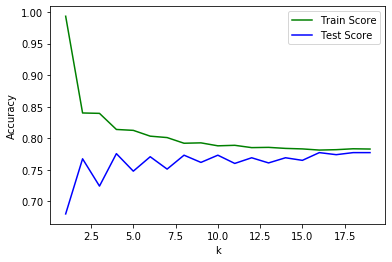

In [103]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [116]:
knn = KNeighborsClassifier(8)
knn.fit(X_train_pca, y_train)
print(knn.score(X_train_pca, y_train))
print(knn.score(X_test_pca, y_test))

0.7921680603712014
0.7732463295269169


In [117]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=8)
print("Cross-validation scores:\n{}".format(cross_val_score(knn , X_train_reduced, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train_reduced, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.75203915 0.77324633 0.7324633  0.73572594 0.76998369 0.77161501
 0.76182708 0.7875817 ]
0.760560273592852


In [118]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
 
knn = KNeighborsClassifier(2)
knn.fit(X_train_pca, y_train)
ypred = knn.predict(X_test_pca)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test)
print(cm)
print(f)

[[921 245]
 [ 40  20]]
0.12307692307692308


##### KNN Classification Summary - Before PCA

Train score: 0.8185

Test score: 0.8154

Cross validation score:0.8032

Best parameters: n_neighbors: 13

F1 Score = 0.4278

##### KNN Classification Summary - After PCA

Train score: 0.7921

Test score: 0.7732

Cross validation score:0.7605

Best parameters: n_neighbors: 8

F1 Score = 0.1230

### Logistic Regression

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)
#create model
pca = PCA(n_components=0.95,random_state = 0)

#train pca model
pca.fit(X_train)

#transforming X_train and X_test
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

In [179]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train_reduced, y_train)
    log_l2.fit(X_train_reduced, y_train)
    train_score_l1.append(log_l1.score(X_train_reduced, y_train))
    train_score_l2.append(log_l2.score(X_train_reduced, y_train))
    test_score_l1.append(log_l1.score(X_test_reduced, y_test))
    test_score_l2.append(log_l2.score(X_test_reduced, y_test))

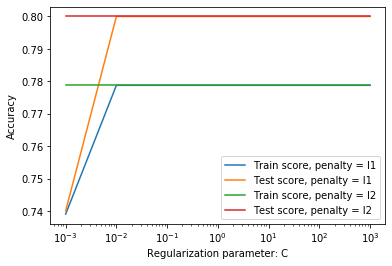

In [180]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [182]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
penalty = ['l1', 'l2']
C = [0.001,0.01,0.1,1,10,100]
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train_reduced, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [183]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.01, 'penalty': 'l1'}
Best cross-validation score: 0.78


In [189]:
log_l2 = LogisticRegression(penalty = 'l2', C = 100)
#log_l1.fit(X_train, y_train)
log_l2.fit(X_train_reduced, y_train)
print(log_l2.score(X_train_reduced, y_train))
#test_score_l1.append(log_l1.score(X_test, y_test))
print(log_l2.score(X_test_reduced, y_test))

0.7787682333873582
0.8


In [186]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
log_l1 = LogisticRegression(penalty = 'l1', C = 0.01)
kfold = KFold(n_splits=2)
print("Cross-validation scores:\n{}".format(cross_val_score(log_l2 , X_train_reduced, y_train, cv=kfold)))
scores = cross_val_score(log_l2 , X_train_reduced, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.77876823 0.77876823]
0.7787682333873582


In [187]:
from sklearn.metrics import f1_score
log_l2 = LogisticRegression(penalty = 'l1', C = 0.01)
log_l2.fit(X_train_reduced, y_train)
ypred = log_l2.predict(X_test_reduced)
ft = f1_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test)
print(ft)
print(cm)

0.0
[[988 247]
 [  0   0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


##### Logistic Regression Summary - Before PCA

Train score: 0.8111

Test score: 0.8234

Cross validation score:0.81

Best parameters: c: 1 

Best parameters: penalty: l1 

F1 Score : 0.4043

##### Logistic Regression Summary - After PCA

Train score: 0.77

Test score: 0.8

Cross validation score:0.7787

Best parameters: c: 0.01 

Best parameters: penalty: l1 

F1 Score : 0.

### Decision Tree

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)
#create model
pca = PCA(n_components=0.95,random_state = 0)

#train pca model
pca.fit(X_train)

#transforming X_train and X_test
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

In [201]:
param_grid = {
    'max_depth' : [1,2,3,4,5,6,7,8,9,10]
}

In [202]:
dtree_clf = GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid, cv=6, return_train_score=True)
dtree_clf.fit(X_train_reduced, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [203]:
print("Best parameters: {}".format(dtree_clf.best_params_))
print("Best cross-validation score: {:.2f}".format(dtree_clf.best_score_))

Best parameters: {'max_depth': 1}
Best cross-validation score: 0.78


In [206]:
dtree = DecisionTreeClassifier(max_depth=1, random_state=0)
dtree.fit(X_train_reduced, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_reduced, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_reduced, y_test)))

Accuracy on training set: 0.779
Accuracy on test set: 0.800


In [207]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
dtree = DecisionTreeClassifier(max_depth=1, random_state=0)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(dtree , X_train_reduced, y_train, cv=kfold)))
scores = cross_val_score(dtree , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.79100851 0.77156744 0.77399757 0.78614824 0.77858881 0.77128954]
0.817058533109832


In [208]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score
dtree = DecisionTreeClassifier(max_depth=1, random_state=0)
dtree.fit(X_train_reduced, y_train)
ypred = dtree.predict(X_test_reduced)
cm = confusion_matrix(ypred,y_test)
ft = f1_score(ypred,y_test)
print(cm)
print(ft)

[[988 247]
 [  0   0]]
0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


##### Decision tree summary - Before PCA

Train score: 0.824

Test score: 0.812

Cross validation score:0.79

F1 Score :0.451

##### Decision tree summary - After PCA

Train score: 0.779

Test score: 0.800

Cross validation score:0.817

F1 Score :0.0

### SVC with Kernel

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)
#create model
pca = PCA(n_components=0.95,random_state = 0)

#train pca model
pca.fit(X_train)

#transforming X_train and X_test
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)
scaler = MinMaxScaler()
scaler.fit(X_train_reduced)
X_train_reduced = scaler.transform(X_train_reduced)
X_test_reduced = scaler.transform(X_test_reduced)


In [210]:
X_train_reduced.shape, y_train.shape

((4936, 2), (4936,))

In [211]:
from sklearn.svm import SVC

train = []
test = []
index = []

for C in [0.001, 0.01,0.1, 1, 10, 100]:
    for gamma in [0.001, 0.01,0.1, 1, 10, 100]:
        #create the model
        svc = SVC(kernel = 'rbf', C = C, gamma = gamma)
        
        #train the model
        svc.fit(X_train_reduced, y_train)
        
        #evaluate the model
        train.append(svc.score(X_train_reduced, y_train))
        test.append(svc.score(X_test_reduced, y_test))
        index.append((C,gamma))

In [229]:
print(train)
print(test)
print(index)

[0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7791734197730956, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7787682333873582, 0.7801863857374393]
[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.7983805668016194]
[(0.001, 0.001), (0.001, 0.01), (0.001, 0.1), (0.001, 1), (0.001, 10), (0.001, 100)

In [213]:
from sklearn.model_selection import GridSearchCV
model = SVC(kernel = 'rbf')

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train_reduced, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [214]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.001, 'gamma': 0.001}
Best cross-validation score: 0.78


In [228]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
svc1 = SVC(kernel = 'rbf',C = 0.001,gamma = 0.001)
kfold = KFold(n_splits=6)
#print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc1 , X_train_reduced, y_train, cv=kfold)
print(scores)
print(np.mean(scores))

[0.79100851 0.77156744 0.77399757 0.78614824 0.77858881 0.77128954]
0.7787666825325027


In [224]:
from sklearn.metrics import f1_score
svc = SVC(kernel = 'rbf', C = 0.001 , gamma = 0.001)
svc.fit(X_train_reduced, y_train)
ypred = svc.predict(X_test_reduced)
f = f1_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test)
print(cm)
print(f)

[[988 247]
 [  0   0]]
0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


##### Kernel Support Vector Machine  - RBF Summary - before PCA

Train score: 0.8114

Test score: 0.8039

Cross validation score:0.81

Best parameters: c: 100

Best parameters: gamma: 0.01 

F1 Score : 0.4040

##### Kernel Support Vector Machine  - RBF Summary - after PCA

Train score: 0.7787

Test score: 0.80

Cross validation score:0.7787

Best parameters: c: 0.001

Best parameters: gamma: 0.001 

F1 Score : 0.0

### Neural network

In [231]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#split data set into train and test
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

In [241]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org.astype(float))
X_test = scaler.transform(X_test_org.astype(float))

In [242]:
X_train.shape

(4936, 15)

In [243]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

np.random.seed(100)

In [246]:
# step 1: build the model
model1 = Sequential()
#input leyer
model1.add(Dense(10, input_dim = 15, activation = 'relu'))
#hidden layer
model1.add(Dense(5, activation = 'relu'))
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

# step 2: build the computational graph - compile
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

# step 3: train the model
model1.fit(X_train, y_train, epochs = 20, batch_size = 100)

# step 4: model evaluation

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy

Epoch 1/20
4936/4936 [==============================] - 0s 46us/sample - loss: 0.6735 - acc: 0.6548
Epoch 2/20
4936/4936 [==============================] - 0s 11us/sample - loss: 0.5840 - acc: 0.7788
Epoch 3/20
4936/4936 [==============================] - 0s 12us/sample - loss: 0.5294 - acc: 0.7788
Epoch 4/20
4936/4936 [==============================] - 0s 14us/sample - loss: 0.5104 - acc: 0.7788
Epoch 5/20
4936/4936 [==============================] - 0s 11us/sample - loss: 0.5002 - acc: 0.7788
Epoch 6/20
4936/4936 [==============================] - 0s 11us/sample - loss: 0.4940 - acc: 0.7788
Epoch 7/20
4936/4936 [==============================] - 0s 12us/sample - loss: 0.4889 - acc: 0.7788
Epoch 8/20
4936/4936 [==============================] - 0s 10us/sample - loss: 0.4845 - acc: 0.7788
Epoch 9/20
4936/4936 [==============================] - 0s 11us/sample - loss: 0.4810 - acc: 0.7788
Epoch 10/20
4936/4936 [==============================] - 0s 12us/sample - loss: 0.4783 - acc: 0.7788

In [247]:
model1.evaluate(X_train, y_train)

4936/4936 [==============================] - 0s 30us/sample - loss: 0.4566 - acc: 0.7788


[0.45661472061851227, 0.77876824]

In [248]:
model1.evaluate(X_test, y_test)

1235/1235 [==============================] - 0s 19us/sample - loss: 0.4548 - acc: 0.8000


[0.4548199435477315, 0.8]

In [249]:
y_pred = model1.predict(X_train)

In [250]:
from sklearn.metrics import precision_score
y_train_pred = np.where(y_pred >= 0.5, 1, 0)
precision_score(y_train, y_train_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0